aplicar
- regularizacion


In [69]:
import pandas as pd
df = pd.read_csv("adult.csv")

In [70]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [72]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [73]:
df["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [74]:
df.replace(['Divorced', 'Married-AF-spouse',
            'Married-civ-spouse', 'Married-spouse-absent',
            'Never-married', 'Separated', 'Widowed'],
           ['divorced', 'married', 'married', 'married',
            'not married', 'not married', 'not married'], inplace=True)

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes("object"):
    df[col] = le.fit_transform(df[col])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


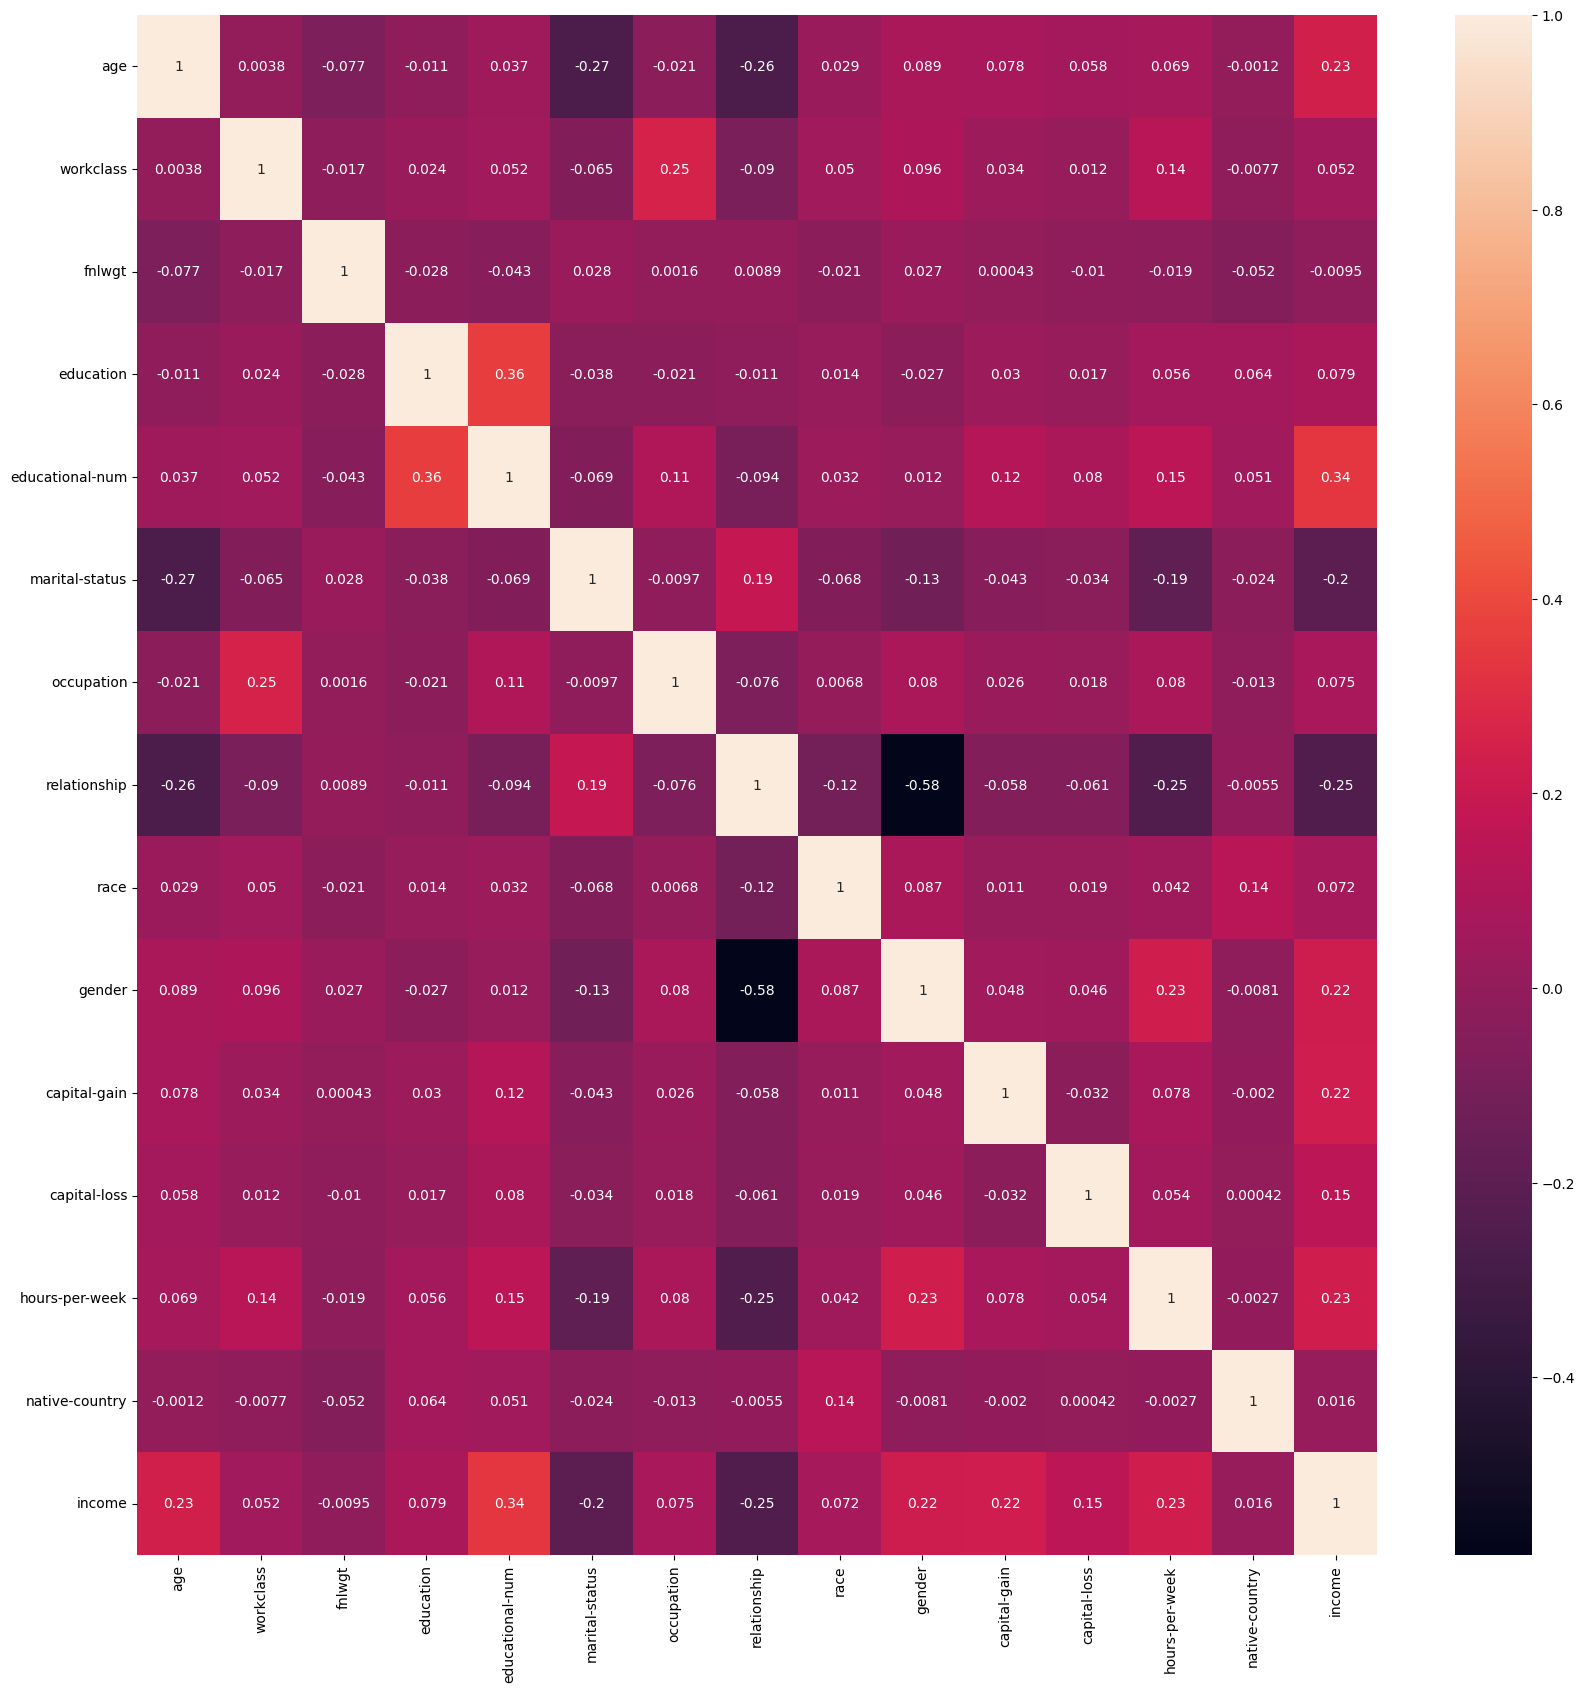

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure( figsize=[20,20])
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [77]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [78]:
df = df.drop_duplicates()

In [79]:
y = df["income"]
x = df.drop(["income","fnlwgt","educational-num" ], axis=1)
x


,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,9,4,1,1,4,1,2174,0,40,39
1,50,6,9,2,4,0,4,1,0,0,13,39
2,38,4,11,0,6,1,4,1,0,0,40,39
3,53,4,1,2,6,0,2,1,0,0,40,39
4,28,4,9,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,2,13,5,4,0,0,0,38,39
32557,40,4,11,2,7,0,4,1,0,0,40,39
32558,58,4,11,6,1,4,4,0,0,0,40,39
32559,22,4,11,4,1,3,4,1,0,0,20,39


In [80]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.75, shuffle=True)



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [3,5,7,9],
    "class_weight" : ["balanced"]
    
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring="recall")

grid.fit(xtrain, ytrain)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'n_estimators': [3, 5, 7, 9]},
             scoring='recall')

In [82]:
ypred = grid.best_estimator_.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(y_true= ytest, y_pred=ypred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6132
           1       0.71      0.66      0.68      2003

    accuracy                           0.85      8135
   macro avg       0.80      0.79      0.79      8135
weighted avg       0.85      0.85      0.85      8135



In [83]:
grid.best_params_

{'class_weight': 'balanced', 'n_estimators': 9}

In [84]:
import pickle 
#write binary
with open('model.pkl', 'wb') as file:
    pickle.dump(grid.best_estimator_, file)